<div style="text-align: justify; padding: 20px; background-color: #000000; color: #ffffff; border-radius: 10px;">

# **Contagem de palavras no contexto de tratamentos de câncer**  
### **Autor: João Guilherme dos Santos Caramês**
📅 **Última modificação:** 18 de Novembro de 2024  

---

## **Trabalho principal:**
### **Autoras: Marina Barim do Nascimento e Isadora Marcondes Lopes**  

---

### **Resumo**  
<p style="text-align: justify; margin: 10px 50px;">
Nesse notebook, são utilizadas técnicas simples de processamentos de texto para identificar a frequência de termos em abstracts de artigos científicos. Basicamente, as palavras são minusculizadas, depois passam por um filtro, com a remoção de *stopwords*, pontuações e caracteres não alfabéticos, e, por fim, são lematizadas.
Com isso, os termos são contabilizados em um dicionário e duas figuras são criadas a partir desse resultado, uma nuvem de palavras com os termos mais frequentes e um gráfico em barras com a frequência de alguns dos termos mais interessantes.
Os dados foram obtidos a partir de duas pesquisas realizadas previamente pelas autoras principais na plataforma Web of Scince.
</p>

---

### **Palavras-chave**  
🔑 *Processamento de texto, Câncer, Tratamento, Invasivo, Autoestima*  

</div>

## Importações

In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import string

from wordcloud import WordCloud

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from collections import defaultdict

## Dados

Aqui, os dados são carregados para o ambiente e organizados em uma lista após a remoção de linhas sem conteúdo e repetidas e minusculização.

In [2]:
pesquisa_invasivo_df = pd.read_excel("Invasive_cancer_therapy.xlsx")
pesquisa_autoestima_df = pd.read_excel("autoestima_cancer.xlsx")

In [3]:
# Invasivo
abstracts_invasivo = list(pesquisa_invasivo_df["Abstract"])
serie_invasivo = pd.Series(abstracts_invasivo)
abstracts_invasivo = serie_invasivo.dropna().unique().tolist()

# Autoestima
abstracts_autoestima = list(pesquisa_autoestima_df["Abstract"])
serie_autoestima = pd.Series(abstracts_autoestima)
abstracts_autoestima = serie_autoestima.dropna().unique().tolist()

In [36]:
print(f"Quantidade total de artigos \n Invasivo: {len(abstracts_invasivo)} \n Autoestima: {len(abstracts_autoestima)}")

Quantidade total de artigos 
 Invasivo: 21336 
 Autoestima: 12984


In [4]:
def processar_texto(texto):
    """
    Executa a minuscularização das palavras no texto.
    
    Parâmetros:
    texto (str): o texto de entrada que será processado.
    
    Retorna:
    texto: o mesmo texto com todas as palavras minúsculas.
    """
    texto = texto.lower()
    
    return texto

In [5]:
lista_abstracts_invasivo = [processar_texto(str(texto)) for texto in abstracts_invasivo]
lista_abstracts_autoestima = [processar_texto(str(texto)) for texto in abstracts_autoestima]

## Filtro e contagem de termos

Nessa parte, é aplicado o filtro e é feita a contagem dos termos. Por fim, o dicionário é ordenado do maior para o menor em termos de frequência.

In [6]:
def filtrar_texto(texto):
    """
    Realiza o pré-processamento de um texto, filtrando palavras irrelevantes.

    Este processo inclui:
    - Tokenização do texto em palavras.
    - Remoção de stopwords, pontuação e termos que não são alfabéticos.
    - Aplicação de lematização para reduzir as palavras à sua forma base.

    Parâmetros:
    texto (str): o texto de entrada que será processado.

    Retorna:
    palavras_lemmatizadas: uma lista de palavras lematizadas e filtradas.
    """
    palavras = word_tokenize(texto)
    
    stop_words = set(stopwords.words('english'))
    palavras_filtradas = [palavra for palavra in palavras 
                          if palavra not in stop_words 
                          and palavra not in string.punctuation 
                          and palavra.isalpha()]
    
    lemmatizer = WordNetLemmatizer()
    palavras_lemmatizadas = [lemmatizer.lemmatize(palavra) for palavra in palavras_filtradas]
    
    return palavras_lemmatizadas

In [7]:
def contar_termos_por_texto(lista_textos):
    """
    Conta a frequência de termos únicos em uma lista de textos.

    Para cada texto:
    - Aplica a função `filtrar_texto` para pré-processamento.
    - Extrai termos únicos do texto filtrado.
    - Conta a ocorrência de cada termo único em todos os textos.

    Parâmetros:
    lista_textos (list): Uma lista de strings, onde cada string é um texto.

    Retorna:
    dict: Um dicionário onde as chaves são termos únicos e os valores são o número de textos em que cada termo aparece.
    """
    contagem_termos = defaultdict(int)
    
    for texto in lista_textos:
        palavras = filtrar_texto(texto)
        termos_unicos = set(palavras)
        
        for termo in termos_unicos:
            contagem_termos[termo] += 1
    
    return dict(contagem_termos)

In [8]:
#Invasivo
contagem_de_termos_por_texto_invasivo = contar_termos_por_texto(lista_abstracts_invasivo)
contagem_de_termos_por_texto_ordenado_invasivo = dict(sorted(contagem_de_termos_por_texto_invasivo.items(), key=lambda x: x[1], reverse=True))

#Autoestima
contagem_de_termos_por_texto_autoestima = contar_termos_por_texto(lista_abstracts_autoestima)
contagem_de_termos_por_texto_ordenado_autoestima = dict(sorted(contagem_de_termos_por_texto_autoestima.items(), key=lambda x: x[1], reverse=True))

## Nuvem de palavras

Cria a nuvem de palavras com as palavras mais frequentes encontradas e selecionadas após a remoção de alguns termos irrelevantes.

In [9]:
dic_nuvem_palavras_invasivo = {
'cancer': 17696, 'therapy': 16129,'invasive': 14558,'patient': 14530,'treatment': 12516,'study': 11906, 'result': 10828,'tumor': 10449,'method': 8993,'cell': 8787,'clinical': 8096,'analysis': 6579,'disease': 6381,'survival': 6131,'breast': 5894,'associated': 5829,'carcinoma': 5388,'outcome': 5340,'potential': 5239,'rate': 5229,'effect': 5160,'compared': 5128,'factor': 5033,'high': 5012,'significant': 4624,'significantly': 4603,'therapeutic': 4540,'response': 4473,'chemotherapy': 4413,'review': 4396,'surgery': 4306,'background': 4273,'expression': 4260,'risk': 4209,'case': 4158,'performed': 4104,'tissue': 4009,'group': 3969,'approach': 3956,'diagnosis': 3841,'primary': 3751,'role': 3671,'model': 3628,'treated': 3612,'metastasis': 3534,'recurrence': 3523,'time': 3513,'stage': 3509,'increased': 3495,'higher': 3452,'respectively': 3385,'based': 3312,'development': 3262,'included': 3262, 'strategy': 3175,'identified': 3140,'growth': 3115,'progression': 3103,'found': 3089,'prognosis': 3062,'different': 3045,'surgical': 3005,'type': 3003,'target': 2998,'early': 2994,'molecular': 2969,'bladder': 2963,'aim': 2950,'total': 2943,'minimally': 2931,'human': 2903,'novel': 2886,'effective': 2861,'imaging': 2850,'age': 2849,'drug': 2839,'efficacy': 2787,'current': 2782,'finding': 2772,'receptor': 2761,'trial': 2725,'objective': 2718,'observed': 2681,'evaluated': 2672
}

dic_nuvem_palavras_autoestima = {
'cancer': 9807,'therapy': 9036,'patient': 9013,'treatment': 7668,'result': 6953,'study': 6923,'method': 5970,'body': 5678,'imaging': 5368,'conclusion': 5337,'tumor': 5164,'clinical': 4685,'appearance': 3926,'cell': 3601,'disease': 3589,'image': 3343,'effect': 3200,'radiation': 3036,'analysis': 3034,'treated': 2850,'time': 2823,'radiotherapy': 2511,'response': 2335,'outcome': 2333,'breast': 2326,'dose': 2323,'group': 2316,'background': 2295,'tissue': 2246,'metastasis': 2237,'potential': 2236,'tomography': 2236,'survival': 2221,'diagnosis': 2189,'lung': 2133,'lesion': 2111,'therapeutic': 1983,'primary': 1976,'risk': 1957,'target': 1930,'quality': 1875,'control': 1872,'carcinoma': 1872,'surgery': 1837
}

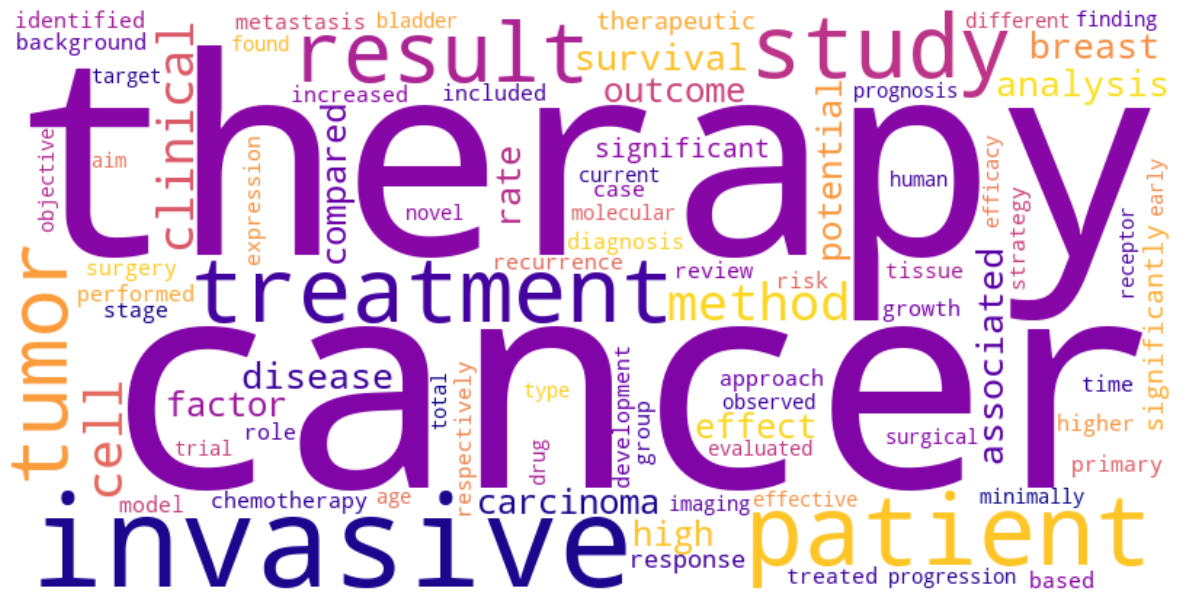

In [10]:
# Invasivo
wordcloud_invasivo = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    max_words=100,
    colormap='plasma'
).generate_from_frequencies(dic_nuvem_palavras_invasivo)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_invasivo, interpolation='bilinear')
plt.axis('off')
plt.savefig(f"Nuvem de palavras Invasivo.png", bbox_inches='tight')
plt.show()

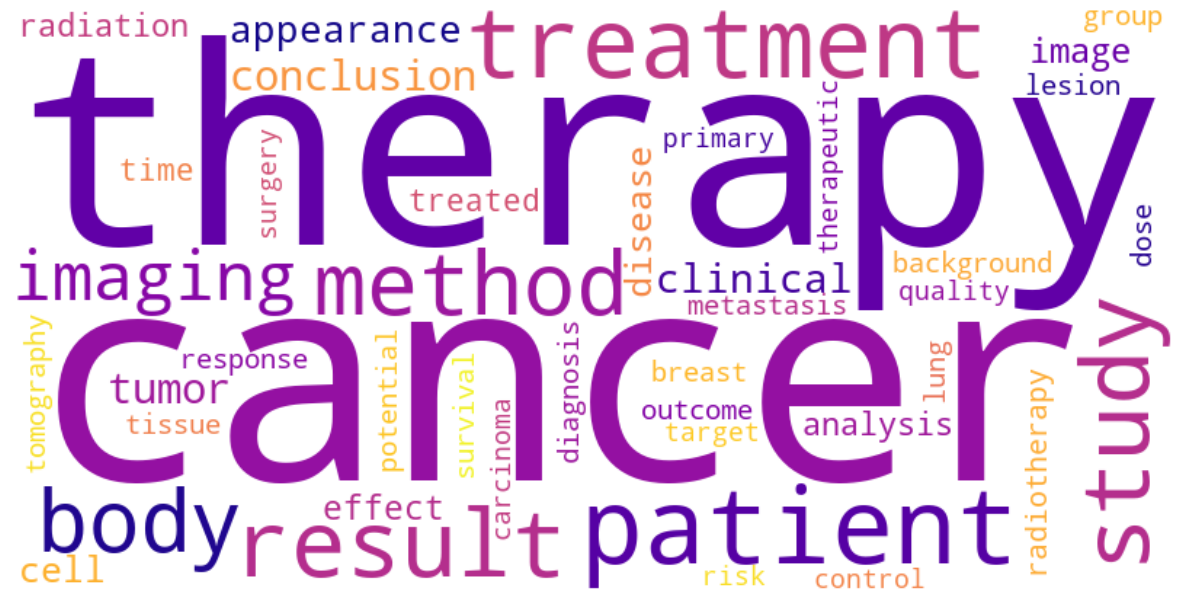

In [11]:
# Autoestima
wordcloud_autoestima = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    max_words=100,
    colormap='plasma'
).generate_from_frequencies(dic_nuvem_palavras_autoestima)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud_autoestima, interpolation='bilinear')
plt.axis('off')
plt.savefig(f"Nuvem de palavras autoestima.png", bbox_inches='tight')
plt.show()

## Gráfico em barras

Cria o gráfico de barras para a frequência de termos mais relevantes à pesquisa.

In [12]:
lista_palavras_barras_invasivo = ['tumor','method','cell','clinical','survival','breast','outcome','effect','tissue','metastasis','prognosis']
dic_barras_invasivo = {}

lista_palavras_barras_autoestima = ['body','imaging','appearance','image','treated','response','breast','therapeutic','quality']
dic_barras_autoestima = {}

for palavra in lista_palavras_barras_invasivo:
    counts_on_articles = contagem_de_termos_por_texto_ordenado_invasivo[palavra]
    dic_barras_invasivo[palavra] = 100 * counts_on_articles/len(lista_abstracts_invasivo)
    
for palavra in lista_palavras_barras_autoestima:
    counts_on_articles = contagem_de_termos_por_texto_ordenado_autoestima[palavra]
    dic_barras_autoestima[palavra] = 100 * counts_on_articles/len(lista_abstracts_autoestima)

In [25]:
def plotar_grafico_barras(contagem_termos, termo, save=False):
    termos_ordenados = sorted(contagem_termos.items(), key=lambda x: x[1], reverse=True)
    
    palavras = [item[0] for item in termos_ordenados]
    frequencias = [item[1] for item in termos_ordenados]
    
    plt.figure(figsize=(12, 9), facecolor="white")
    
    plt.rc('font', family='Times New Roman')
    
    bars = plt.barh(palavras, frequencias, edgecolor='black', linewidth=10)
    
    plt.gca().invert_yaxis()
    plt.gca().set_facecolor('#FFFCF9')
    
    plt.title(f'Quantidade de artigos por termo no resumo - {termo}', fontsize=22, weight='bold')
    plt.xlabel('Quantidade de artigos (%)', fontsize=20, weight='bold')
    #plt.ylabel('Termos', fontsize=18, weight='bold')
    
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    cmap = plt.get_cmap('RdPu')
    for i, bar in enumerate(bars):
        bar.set_color(cmap(np.linspace(0.8, 0.2, len(bars)))[i])
        bar.set_edgecolor('black')
        bar.set_linewidth(2)
        
    if save == True:
        plt.savefig(f"Quantidade de artigos por termo no resumo {termo}.png", bbox_inches='tight')
    plt.show()

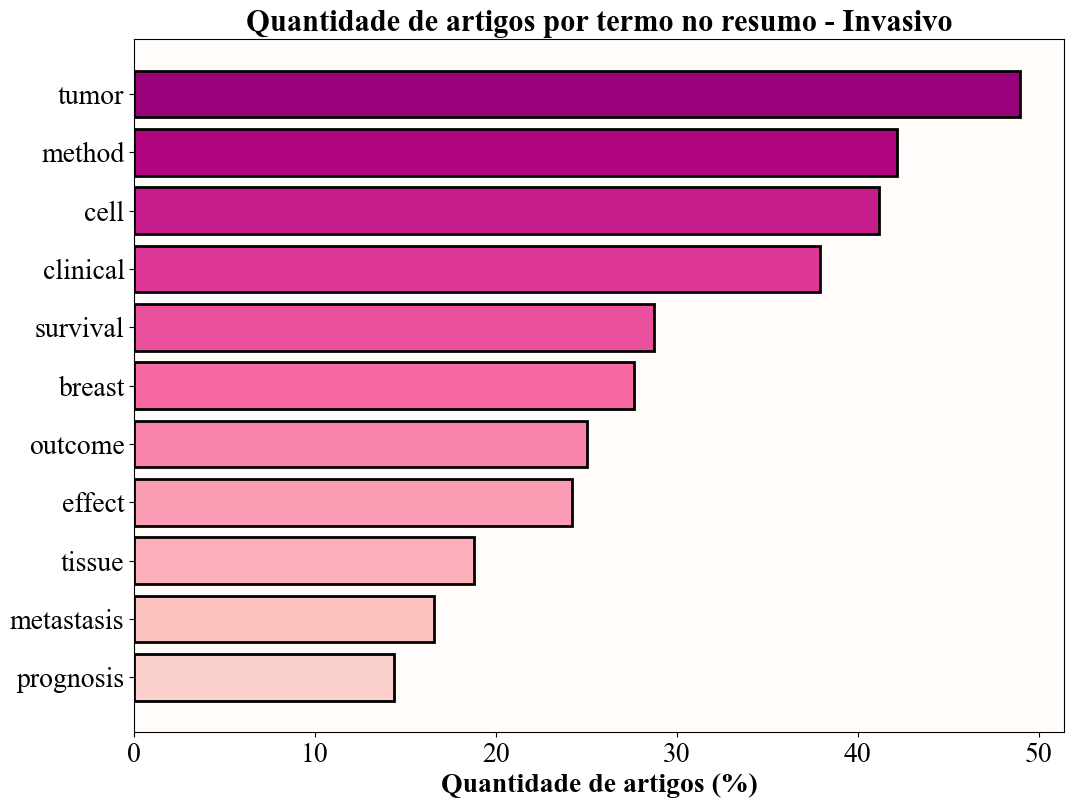

In [26]:
# Invasivo
plotar_grafico_barras(dic_barras_invasivo, "Invasivo", save=True)

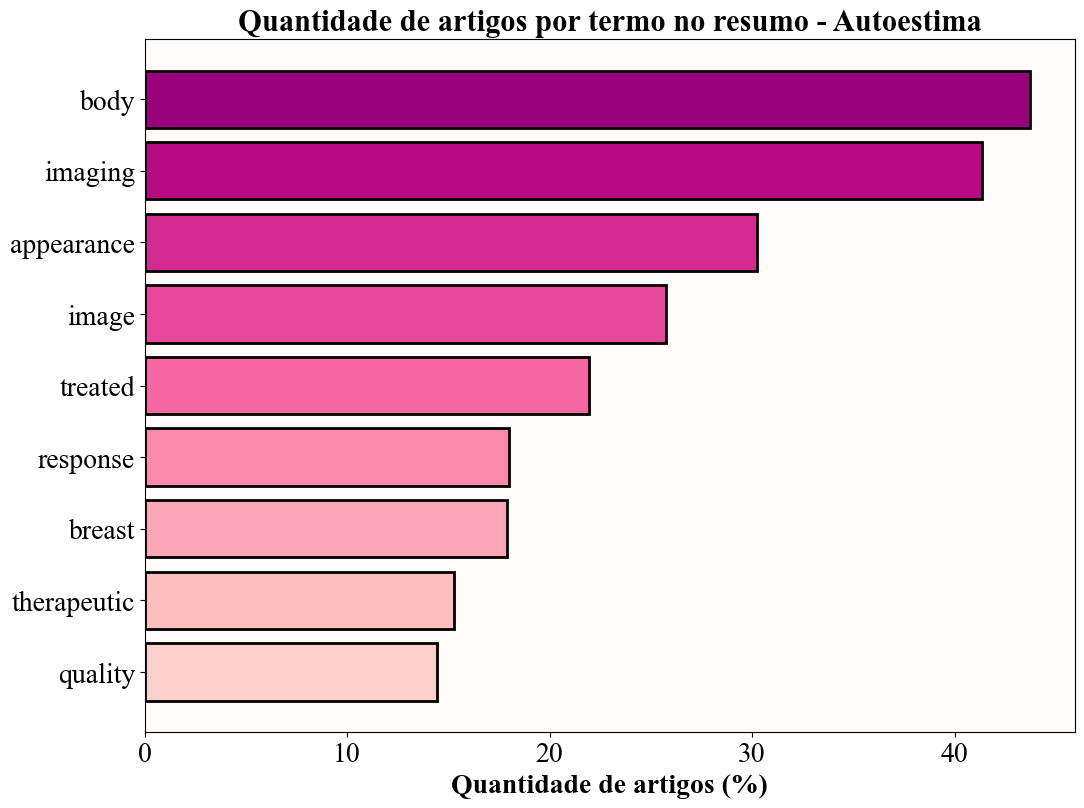

In [27]:
# Autoestima
plotar_grafico_barras(dic_barras_autoestima, "Autoestima", save=True)